# Dyna Maze

<span style="font-family: monospace; font-size:18px;">
In this Jupyter notebook, we address Example 8.1, the Dyna Maze, using the Dyna-Q algorithm; Example 8.2, the Blocking Maze, with both Dyna-Q and Dyna-Q+ algorithms; and Example 8.3, the Shortcut Maze, with both algorithms as well, as presented in Barto's reinforcement learning book. We intend to compare the effectiveness of these algorithms in static environments and scenarios with dynamic obstacles, showcasing the enhanced adaptability of Dyna-Q+ with exploration bonuses in changing mazes. 
</span>

## Import libraries

In [1]:
from maze_class import Maze
from dyna_q_agent_class import DynaQAgent
from dyna_q_plus_agent_class import DynaQPlusAgent
from utils import (get_optimal_value_function_and_policy, plot_optimal_policy_and_state_values,
                   find_optimal_trajectory, plot_trajectory, steps_per_episode, plot_steps_per_episode,
                   cumulative_reward_per_timestep, plot_cumulative_reward_per_timestep)
from config import (ACTIONS, STATES, INITIAL_STATE_BLOCKING_MAZE, GOAL_STATE_BLOCKING_MAZE, BARRIER_CELLS_1, BARRIER_CELLS_2, 
                    INITIAL_STATE_SHORTCUT_MAZE, GOAL_STATE_SHORTCUT_MAZE, BARRIER_CELLS_3)

# Dyna Maze

## Create environment

In [2]:
env = Maze()

## Two episodes and no planning steps (n = 0)

<br>

<span style="font-family: 'Times New Roman', Times, serif; font-size:0.99em; font-style:italic;">
P.S. In the book, the agent is halfway through the second episode. Here we are considering the second episode as completed. 
</span>


### Run simulation

In [3]:
%%time

dyna_q_agent = DynaQAgent(env, ACTIONS, alpha=0.1, epsilon=0.1, gamma=0.95, planning_steps=0)
state_action_function, history = dyna_q_agent.run_simulation(n_episodes=2)

CPU times: user 55.1 ms, sys: 3.92 ms, total: 59 ms
Wall time: 57.4 ms


### Optimal State Values and Optimal Policy

<br>

<span style="font-family: 'Times New Roman', Times, serif; font-size:0.99em; font-style:italic;">
P.S. No arrows means that all state-action values are equal.
</span>


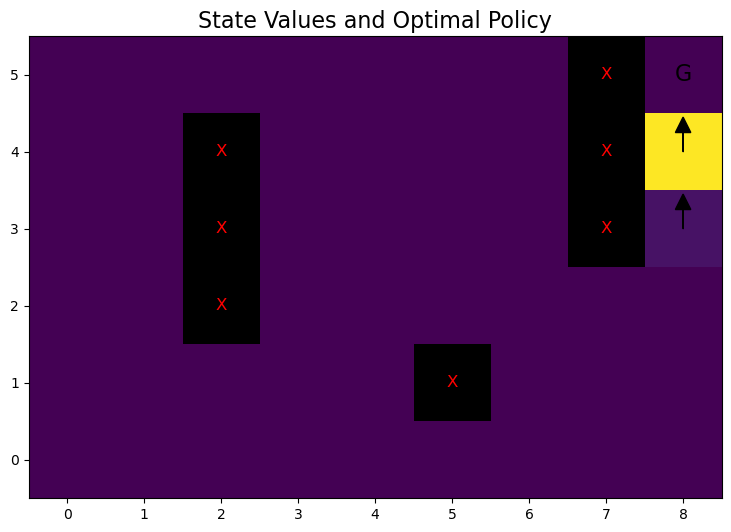

In [4]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS)

## Two episodes and few planning steps (n = 5)


### Run simulation

In [5]:
%%time

dyna_q_agent = DynaQAgent(env, ACTIONS, alpha=0.1, epsilon=0.1, gamma=0.95, planning_steps=5)
state_action_function, history = dyna_q_agent.run_simulation(n_episodes=2)

CPU times: user 28.2 ms, sys: 364 µs, total: 28.6 ms
Wall time: 25.2 ms


### Optimal State Values and Optimal Policy


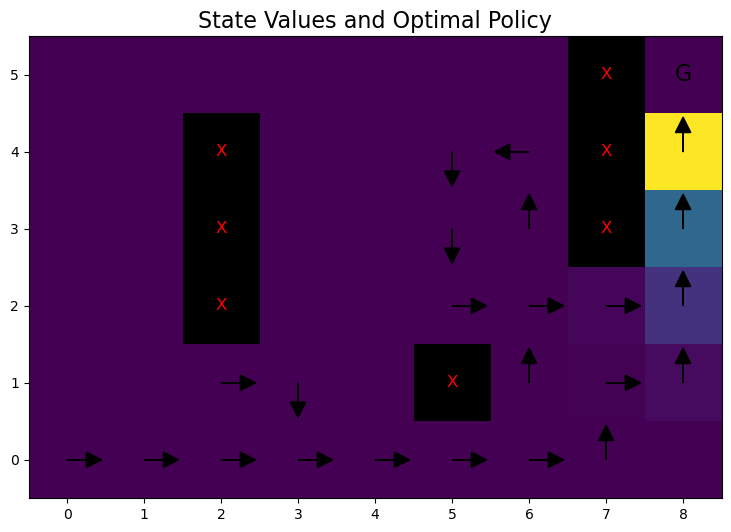

In [6]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS)

## Two episodes and many planning steps (n = 50)

### Run simulation

In [7]:
%%time

dyna_q_agent = DynaQAgent(env, ACTIONS, alpha=0.1, epsilon=0.1, gamma=0.95, planning_steps=50)
state_action_function, history = dyna_q_agent.run_simulation(n_episodes=2)

CPU times: user 238 ms, sys: 0 ns, total: 238 ms
Wall time: 234 ms


### Optimal State Values and Optimal Policy

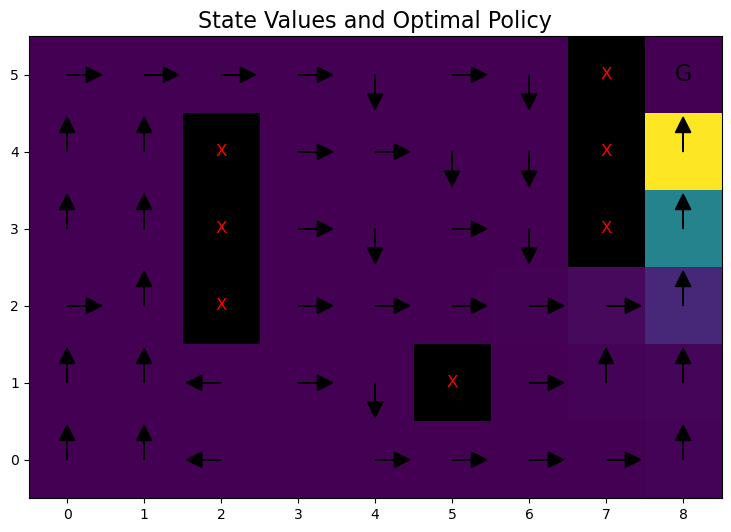

In [8]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS)

## Complete simulation

### Run simulation

In [9]:
%%time

dyna_q_agent = DynaQAgent(env, ACTIONS, alpha=0.1, epsilon=0.1, gamma=0.95, planning_steps=50)
state_action_function, history = dyna_q_agent.run_simulation(n_episodes=1000)

CPU times: user 6.03 s, sys: 16.1 ms, total: 6.04 s
Wall time: 6.09 s


### Optimal State Values and Optimal Policy

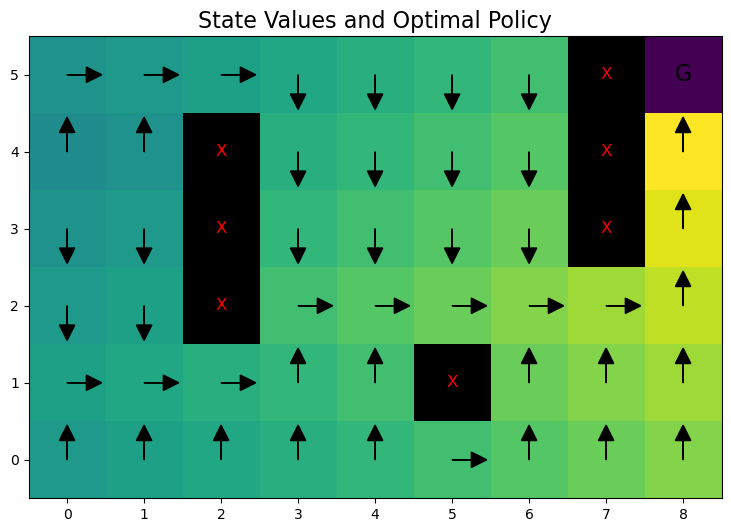

In [10]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS)

### Optimal trajectory

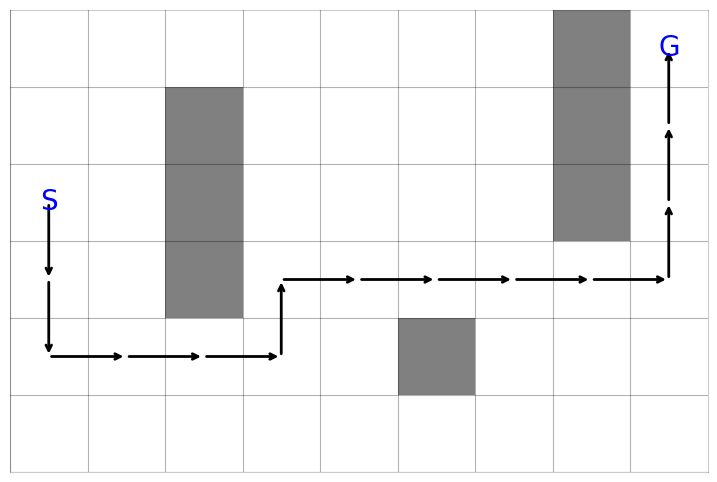

In [11]:
env.reset()
optimal_trajectory = find_optimal_trajectory(env, optimal_policy, ACTIONS)
plot_trajectory(optimal_trajectory)

## Steps per episode

In [12]:
dyna_q_agent_1 = DynaQAgent(env, ACTIONS, alpha=0.1, epsilon=0.1, gamma=0.95, planning_steps=0)
dyna_q_agent_2 = DynaQAgent(env, ACTIONS, alpha=0.1, epsilon=0.1, gamma=0.95, planning_steps=5)
dyna_q_agent_3 = DynaQAgent(env, ACTIONS, alpha=0.1, epsilon=0.1, gamma=0.95, planning_steps=50)

steps_per_episode_1 = steps_per_episode(dyna_q_agent_1, iterations=100, n_episodes=50)
steps_per_episode_2 = steps_per_episode(dyna_q_agent_2, iterations=100, n_episodes=50)
steps_per_episode_3 = steps_per_episode(dyna_q_agent_3, iterations=100, n_episodes=50)

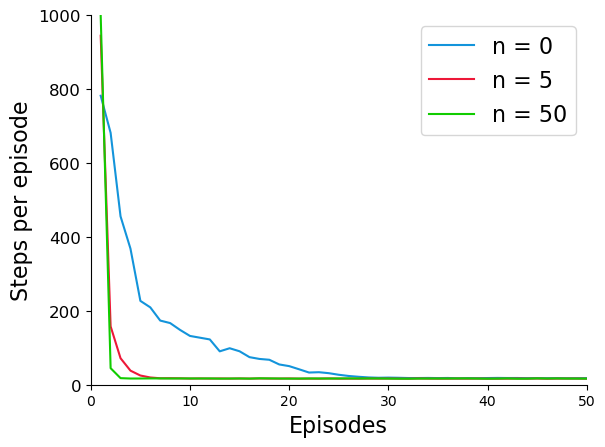

In [13]:
results = [{"data": {"x": steps_per_episode_1["episode"], "y": steps_per_episode_1["avg_timesteps"]},
           "param": {"label": "n = 0", "color": "#1394DB"}},
           {"data": {"x": steps_per_episode_2["episode"], "y": steps_per_episode_2["avg_timesteps"]},
            "param": {"label": "n = 5", "color": "#ED1838"}},
           {"data": {"x": steps_per_episode_3["episode"], "y": steps_per_episode_3["avg_timesteps"]},
            "param": {"label": "n = 50", "color": "#11CC00"}}]

plot_steps_per_episode(results)

## Dyna-Q vs Dyna-Q+ in Blocking Maze

### Create environments

In [14]:
env1 = Maze(initial_state=INITIAL_STATE_BLOCKING_MAZE, goal_state=GOAL_STATE_BLOCKING_MAZE, blocked_cells=BARRIER_CELLS_1)
env2 = Maze(initial_state=INITIAL_STATE_BLOCKING_MAZE, goal_state=GOAL_STATE_BLOCKING_MAZE, blocked_cells=BARRIER_CELLS_2)

## Dyna-Q in Blocking Maze 1

### Run simulation

In [15]:
%%time

dyna_q_agent = DynaQAgent(env1, ACTIONS, alpha=0.5, epsilon=0.1, gamma=0.95, planning_steps=50)
state_action_function, _ = dyna_q_agent.run_simulation(n_episodes=10)

CPU times: user 246 ms, sys: 22 µs, total: 246 ms
Wall time: 240 ms


### Optimal State Values and Optimal Policy


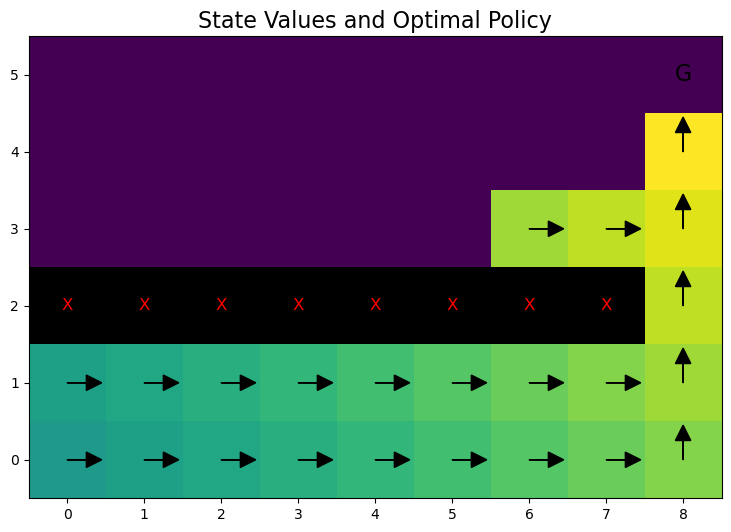

In [16]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS, blocked_cells=BARRIER_CELLS_1)

## Dyna-Q in Blocking Maze 2

### Run simulation

In [17]:
dyna_q_agent.update_environment(env2)

state_action_function, _ = dyna_q_agent.run_simulation(n_episodes=10)

### Optimal State Values and Optimal Policy


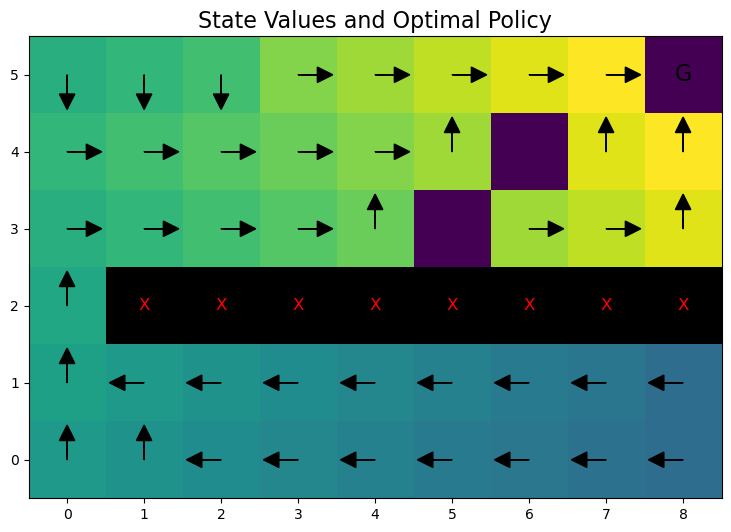

In [18]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS, blocked_cells=BARRIER_CELLS_2)

## Dyna-Q+ in Blocking Maze 1

### Run simulation

In [19]:
dyna_q_plus_agent = DynaQPlusAgent(env1, ACTIONS, alpha=0.5, epsilon=0.1, gamma=0.95, planning_steps=50, exploration_rate=0.001)
state_action_function, _ = dyna_q_plus_agent.run_simulation(n_episodes=10)

### Optimal State Values and Optimal Policy


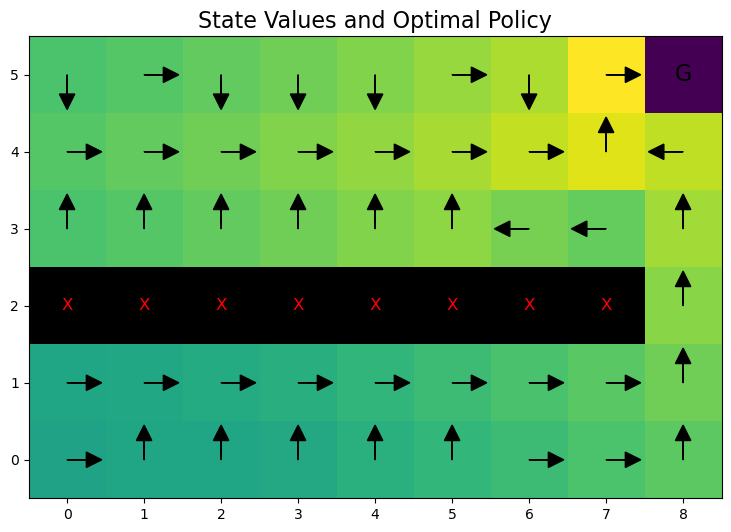

In [20]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS, blocked_cells=BARRIER_CELLS_1)

## Dyna-Q+ in Blocking Maze 2

### Run simulation

In [21]:
dyna_q_plus_agent.update_environment(env2)

state_action_function, _ = dyna_q_plus_agent.run_simulation(n_episodes=10)

### Optimal State Values and Optimal Policy


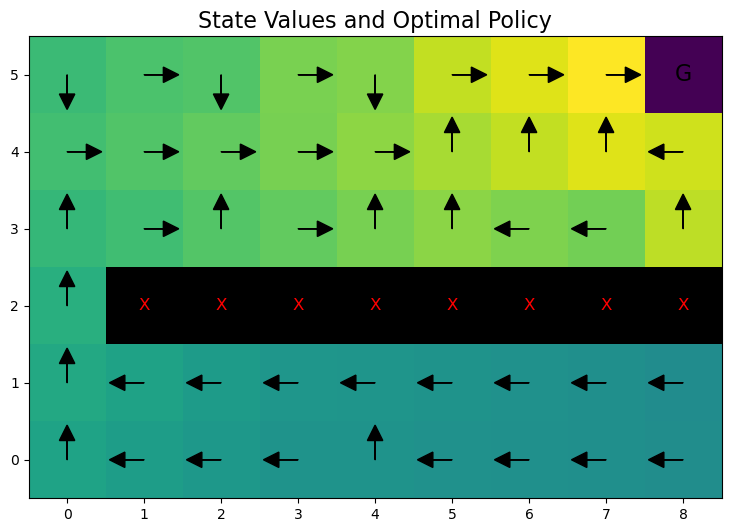

In [22]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS, blocked_cells=BARRIER_CELLS_2)

## Cumulative reward comparison with changing environments

In [23]:
dyna_q_data = cumulative_reward_per_timestep(dyna_q_agent, env1, env2, iterations=100, n_episodes=160)
dyna_q_plus_data = cumulative_reward_per_timestep(dyna_q_plus_agent, env1, env2, iterations=100, n_episodes=160)

In [24]:
data = [{"data": {"x": dyna_q_data["timestep"], "y": dyna_q_data["cumulative_reward"]},
           "param": {"label": "Dyna-Q", "color": "#1394DB"}},
           {"data": {"x": dyna_q_plus_data["timestep"], "y": dyna_q_plus_data["cumulative_reward"]},
            "param": {"label": "Dyna-Q+", "color": "#ED1838"}},
        ]

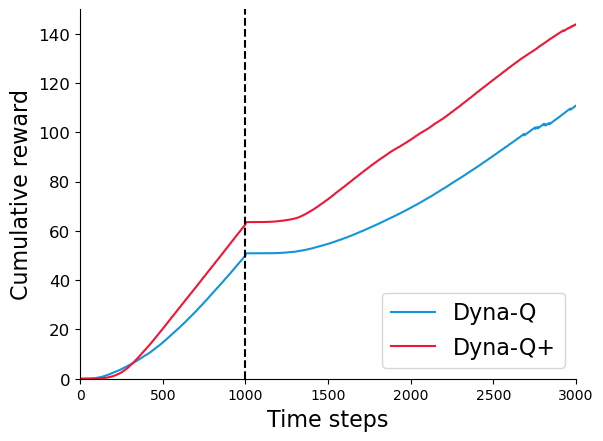

In [25]:
plot_cumulative_reward_per_timestep(data)

# Dyna-Q vs Dyna-Q+ in Shortcut Maze

## Create environments

In [26]:
env1 = Maze(initial_state=INITIAL_STATE_SHORTCUT_MAZE, goal_state=GOAL_STATE_SHORTCUT_MAZE, blocked_cells=BARRIER_CELLS_2)
env2 = Maze(initial_state=INITIAL_STATE_SHORTCUT_MAZE, goal_state=GOAL_STATE_SHORTCUT_MAZE, blocked_cells=BARRIER_CELLS_3)

## Dyna-Q in Blocking Maze 2

### Run simulation

In [27]:
%%time

dyna_q_agent = DynaQAgent(env1, ACTIONS, alpha=0.5, epsilon=0.1, gamma=0.95, planning_steps=50)
state_action_function, _ = dyna_q_agent.run_simulation(n_episodes=3000)

CPU times: user 18 s, sys: 12.1 ms, total: 18 s
Wall time: 17.9 s


### Optimal State Values and Optimal Policy


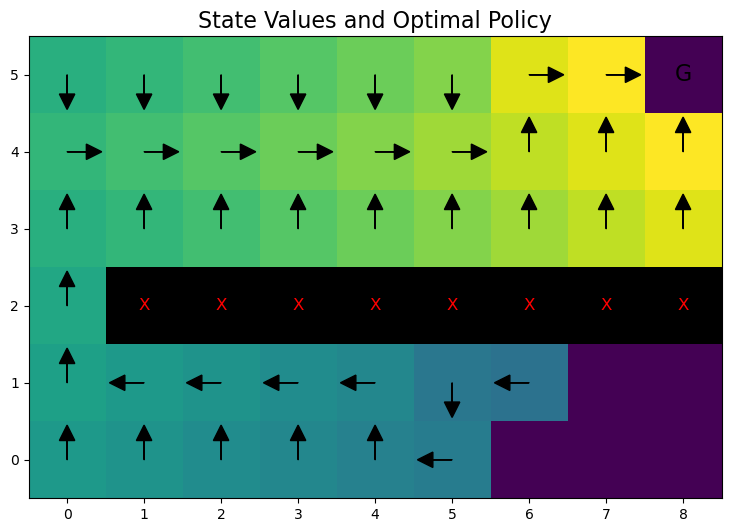

In [28]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS, blocked_cells=BARRIER_CELLS_2)

## Dyna-Q in Shortcut Maze

### Run simulation

In [29]:
%%time

dyna_q_agent.update_environment(env2)

state_action_function, _ = dyna_q_agent.run_simulation(n_episodes=3000)

CPU times: user 18.4 s, sys: 44.1 ms, total: 18.4 s
Wall time: 18.3 s


### Optimal State Values and Optimal Policy


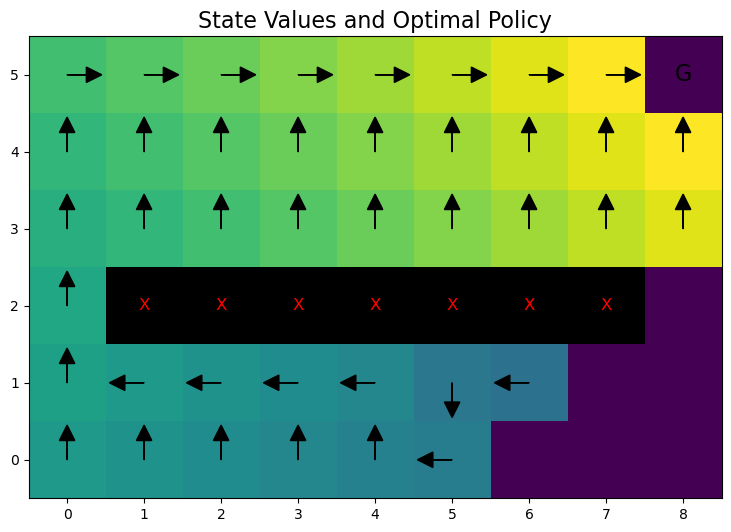

In [30]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS, blocked_cells=BARRIER_CELLS_3)

### Optimal trajectory

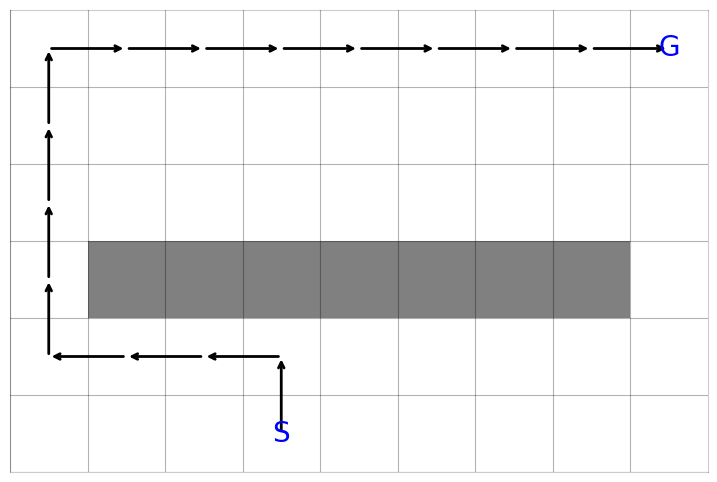

In [31]:
env2.reset()
optimal_trajectory = find_optimal_trajectory(env2, optimal_policy, ACTIONS)
plot_trajectory(optimal_trajectory, blocked_cells=BARRIER_CELLS_3)

## Dyna-Q+ in Blocking Maze 2

### Run simulation

In [32]:
%%time

dyna_q_plus_agent = DynaQPlusAgent(env1, ACTIONS, alpha=0.5, epsilon=0.1, gamma=0.95, planning_steps=50, exploration_rate=0.001)
state_action_function, _ = dyna_q_plus_agent.run_simulation(n_episodes=3000)

CPU times: user 27 s, sys: 24 ms, total: 27 s
Wall time: 26.9 s


### Optimal State Values and Optimal Policy


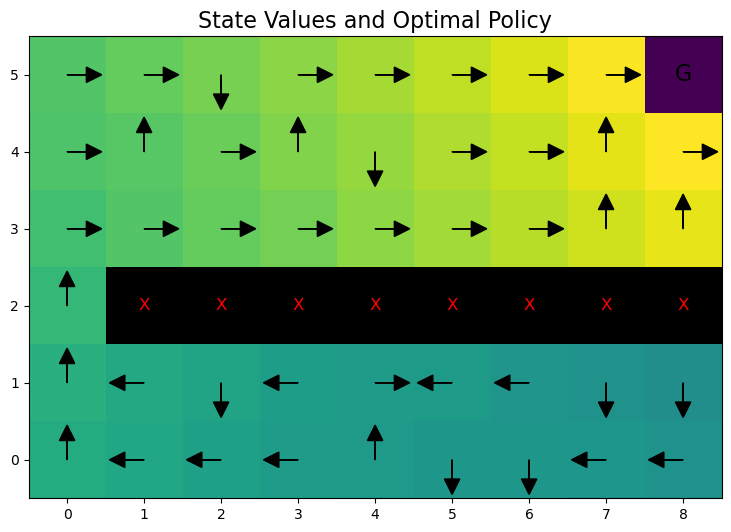

In [33]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS, blocked_cells=BARRIER_CELLS_2)

## Dyna-Q+ in Shortcut Maze

### Run simulation

In [34]:
%%time

dyna_q_plus_agent.update_environment(env2)

state_action_function, _ = dyna_q_plus_agent.run_simulation(n_episodes=3000)

CPU times: user 16.4 s, sys: 24 ms, total: 16.5 s
Wall time: 16.4 s


### Optimal State Values and Optimal Policy

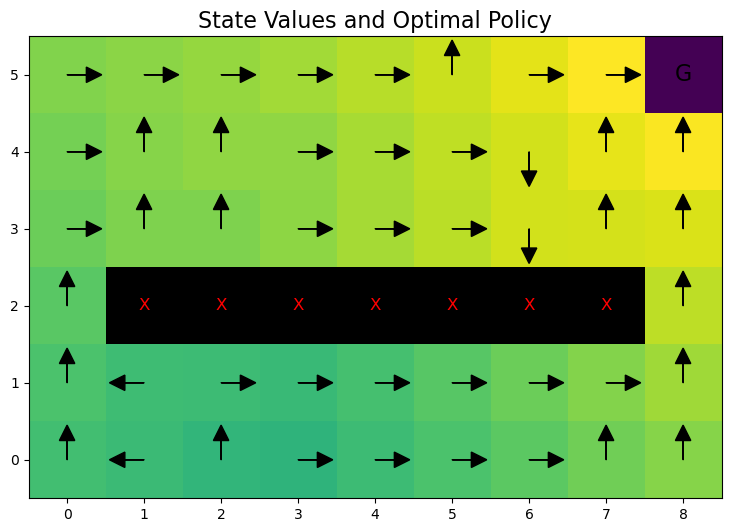

In [35]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS, blocked_cells=BARRIER_CELLS_3)

### Optimal trajectory

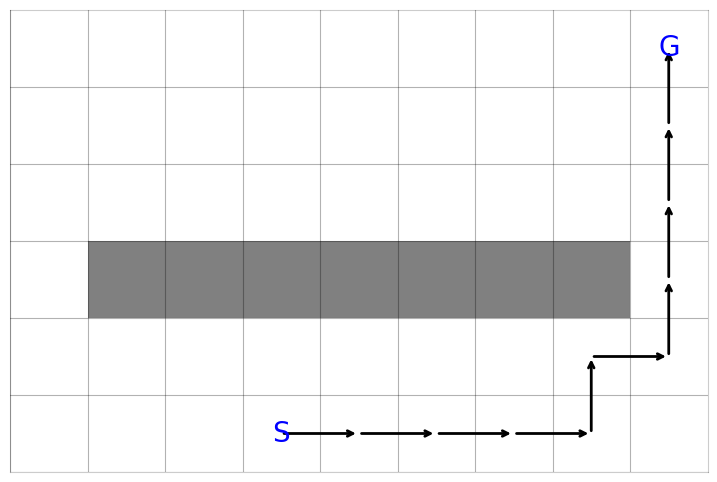

In [36]:
env2.reset()
optimal_trajectory = find_optimal_trajectory(env2, optimal_policy, ACTIONS)
plot_trajectory(optimal_trajectory, blocked_cells=BARRIER_CELLS_3)

## Cumulative reward comparison with changing environments

In [37]:
%%time

env_change_timestep = 3000

dyna_q_data = cumulative_reward_per_timestep(dyna_q_agent, env1, env2, iterations=100, n_episodes=500, env_change_timestep=env_change_timestep)
dyna_q_plus_data = cumulative_reward_per_timestep(dyna_q_plus_agent, env1, env2, iterations=100, n_episodes=500, env_change_timestep=env_change_timestep)

CPU times: user 11min 13s, sys: 496 ms, total: 11min 13s
Wall time: 11min 13s


In [38]:
data = [{"data": {"x": dyna_q_data["timestep"], "y": dyna_q_data["cumulative_reward"]},
           "param": {"label": "Dyna-Q", "color": "#1394DB"}},
           {"data": {"x": dyna_q_plus_data["timestep"], "y": dyna_q_plus_data["cumulative_reward"]},
            "param": {"label": "Dyna-Q+", "color": "#ED1838"}},
        ]

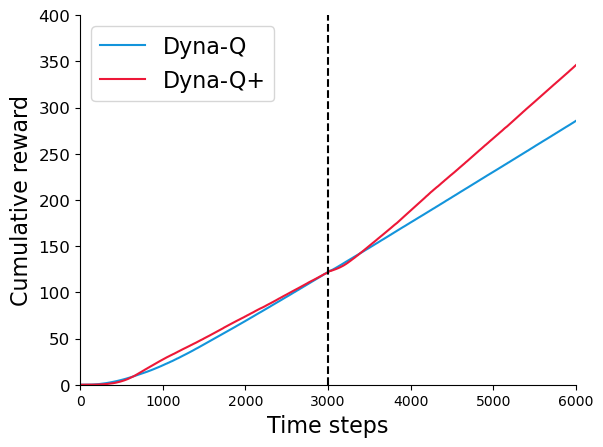

In [39]:
plot_cumulative_reward_per_timestep(data, xlim=(0, 6000), ylim=(0, 400), env_change_timestep=env_change_timestep)